<a href="https://colab.research.google.com/github/sun9huni/SARang-Lab/blob/main/0722_rdkit_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install rdkit

In [5]:
# basic molecular functionality
from rdkit import Chem

In [6]:
# 다양한 방식으로 각 분자 구성 가능
m = Chem.MolFromSmiles('Cc1ccccc1')
m = Chem.MolFromMolFile('data/input.mol')
stringWithMolData = open('data/input.mol','r').read()
m = Chem.MolFromMolBlock(stringWithMolData)

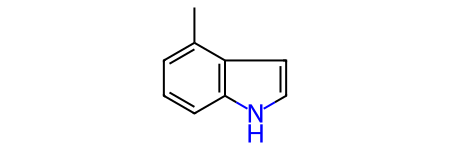

In [7]:
m

In [8]:
# Draw.MolToImage(m)
from rdkit.Chem import Draw
img = Draw.MolToImage(m)

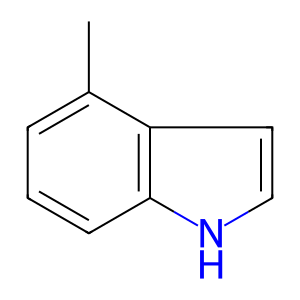

In [9]:
img

In [10]:
m1 = Chem.MolFromSmiles('CO(C)C')
# (1번 원자 산소(O)의 원자가가 허용된 값을 초과했습니다)

[10:34:04] Explicit valence for atom # 1 O, 3, is greater than permitted


In [11]:
m2 = Chem.MolFromSmiles('c1cc1')
# (분자를 케쿨화할 수 없습니다)
# aromatic ring을 단일-이중 결합이 번갈아 나타나는 형태로 변환할 수 없다.

[10:34:04] Can't kekulize mol.  Unkekulized atoms: 0 1 2


# Reading sets of molecules
Groups of molecules are read using a Supplier (for example, an rdkit.Chem.rdmolfiles.SDMolSupplier or a rdkit.Chem.rdmolfiles.SmilesMolSupplier):
여러 개의 분자 정보가 들어있는 파일을 효율적으로 읽어들이기 위한 도구

In [12]:
# 원자 번호 확인
suppl = Chem.SDMolSupplier('data/5ht3ligs.sdf')
for mol in suppl:
  print(mol.GetNumAtoms())

20
24
24
26


In [13]:
# 분자 총 개수 확인
mols = [x for x in suppl]
len(mols)

4

In [14]:
suppl[0].GetNumAtoms()

20

In [15]:
# 안전한 파일 처리
with Chem.SDMolSupplier('data/5ht3ligs.sdf') as suppl:
  for mol in suppl:
    if mol is None: continue
    print(mol.GetNumAtoms())

20
24
24
26


In [16]:
# 파일 객체 직접 사용
inf = open('data/5ht3ligs.sdf','rb')
with Chem.ForwardSDMolSupplier(inf) as fsuppl:
  for mol in fsuppl:
    if mol is None: continue
    print(mol.GetNumAtoms())

20
24
24
26


In [17]:
# 압축 파일 처리
import gzip
inf = gzip.open('data/actives_5ht3.sdf.gz')
with Chem.ForwardSDMolSupplier(inf) as gzsuppl:
  ms = [x for x in gzsuppl if x is not None]
len(ms)

180

In [18]:
# []인덱싱을 사용한 임의 접근 시 에러 발생
inf = open('data/5ht3ligs.sdf','rb')
with Chem.ForwardSDMolSupplier(inf) as fsuppl:
  fsuppl[0]  # <- 여기서 TypeError 발생!

TypeError: 'ForwardSDMolSupplier' object is not subscriptable

In [19]:
i = 0
with Chem.MultithreadedSDMolSupplier('data/5ht3ligs.sdf') as sdSupl:
  for mol in sdSupl:
    if mol is not None:
      i += 1

print(i)
# multithreading 이용 파일에서 분자를 읽기와 처리하는 작업을 동시에 수행하여 성능을 높인다.

4


# Writing molecules

In [20]:
# 분자 생성
m = Chem.MolFromMolFile('data/chiral.mol')
Chem.MolToSmiles(m)

'C[C@H](O)c1ccccc1'

In [21]:
# 입체화학(3차원) 정보 제거
Chem.MolToSmiles(m,isomericSmiles=False)

'CC(O)c1ccccc1'

In [22]:
# Canonical SMILES - 하나의 분자 구조에 대해 단 하나의 유일한 SMILES 문자열
Chem.MolToSmiles(Chem.MolFromSmiles('C1=CC=CN=C1'))
Chem.MolToSmiles(Chem.MolFromSmiles('c1cccnc1'))
Chem.MolToSmiles(Chem.MolFromSmiles('n1ccccc1'))

'c1ccncc1'

In [23]:
# kekuleSmiles
# 방향족 고리를 소문자 대신 kekule 구조로 표현
Chem.Kekulize(m)
Chem.MolToSmiles(m, kekuleSmiles = True)

'C[C@H](O)C1=CC=CC=C1'

In [24]:
# MDL Mol block
# 원자의 좌표, 결합 정보 등을 담고 있는 표준 텍스트 형식
m2 = Chem.MolFromSmiles('C1CCC1')
print(Chem.MolToMolBlock(m2))


     RDKit          2D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



In [25]:
# 이름 설정
m2.SetProp("_Name", "cyclobutane")
print(Chem.MolToMolBlock(m2))


cyclobutane
     RDKit          2D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



In [26]:
from rdkit.Chem import AllChem

# 분자의 2D 좌표를 계산하여 저장
AllChem.Compute2DCoords(m2)

0

In [27]:
print(Chem.MolToMolBlock(m2))

cyclobutane
     RDKit          2D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0607   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



In [28]:
# 3D 구조 생성을 위해 수소 추가(정확한 3D 좌표를 위해 필수)
m3 = Chem.AddHs(m2)
# 랜덤 시드 설정
params = AllChem.ETKDGv3()
params.randomSeed = 0xf00d
# 3D 구조 생성
AllChem.EmbedMolecule(m3, params)

0

In [29]:
print(Chem.MolToMolBlock(m3))

cyclobutane
     RDKit          3D

 12 12  0  0  0  0  0  0  0  0999 V2000
    1.0257    0.2442   -0.0991 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2041    0.9236    0.4320 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0443   -0.2424   -0.0253 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2102   -0.9939   -0.3417 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4192    0.7683   -0.9787 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.8181    0.1486    0.6820 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1697    1.0826    1.5236 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5360    1.8377   -0.1050 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6809   -0.0600   -0.8987 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6510   -0.6193    0.8225 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.4659   -1.7768    0.3858 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.3467   -1.3126   -1.3975 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
  1  5  1  0
  1  6  1  0
  2  7

In [30]:
# 분석에 필요 없다면 수소 다시 제거
m3 = Chem.RemoveHs(m3)
print(Chem.MolToMolBlock(m3))

cyclobutane
     RDKit          3D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0257    0.2442   -0.0991 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2041    0.9236    0.4320 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0443   -0.2424   -0.0253 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2102   -0.9939   -0.3417 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



In [31]:
# 파일로 저장
print(Chem.MolToMolBlock(m2), file = open('data/foo.mol','w+'))

# Writing sets of molecules

In [32]:
# data/foo.sdf 파일에 분자를 쓰기
with Chem.SDWriter('data/foo.sdf') as w:
  for m in mols:
    w.write(m)

In [33]:
from io import StringIO
sio = StringIO() # 파일처럼 작동하는 인메모리 텍스트 버퍼 생성
with Chem.SDWriter(sio) as w:
  for m in mols:
    w.write(m)
print(sio.getvalue())

mol-295
     RDKit          3D

 20 22  0  0  1  0  0  0  0  0999 V2000
    2.3200    0.0800   -0.1000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8400   -1.2200    0.1200 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.6800    0.0800    0.2600 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7400    1.2800   -0.5600 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.9400   -1.9200    0.6000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.5400   -1.7400   -0.0800 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.0200   -1.1400    0.6600 N   0  0  0  0  0  0  0  0  0  0  0  0
    4.4600    1.2600    0.1600 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5200    2.4600   -0.6600 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3800   -1.0400   -0.5000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.3000   -2.9200    0.1800 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.8800    2.4400   -0.3000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6800   -1.2400   -0.7800 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5800   -0.32

# Working with Molecules


In [34]:
m = Chem.MolFromSmiles('C1OC1')
# 모든 원자의 원자 번호 출력
for atom in m.GetAtoms():
  print(atom.GetAtomicNum())
# 첫 번째 결합의 종류 출력
print(m.GetBonds()[0].GetBondType())

6
8
6
SINGLE


직접 접근하기

In [35]:
# 0 번 인덱스 원자의 속성
print(m.GetAtomWithIdx(0).GetSymbol())
print(m.GetAtomWithIdx(0).GetExplicitValence())
print(m.GetBondWithIdx(0).GetBeginAtomIdx())
print(m.GetBondWithIdx(0).GetEndAtomIdx())
print(m.GetBondBetweenAtoms(0,1).GetBondType())

C
2
0
1
SINGLE


[10:34:16] DEPRECATION WARNING: please use GetValence(which=)


In [36]:
# 0번 인덱스 원자의 이웃 원자들의 원자 번호
atom = m.GetAtomWithIdx(0)
[x.GetAtomicNum() for x in atom.GetNeighbors()]

[8, 6]

In [37]:
len(atom.GetNeighbors()[-1].GetBonds())

2

Ring Information

- IsInRing(): 원자 또는 결합이 어떤 고리에든 속해 있는지 확인

- IsInRingSize(N): 원자 또는 결합이 N개의 원자로 이루어진 특정 크기의 고리에 속해 있는지 확인

In [38]:
m = Chem.MolFromSmiles('OC1C2C1CC2')
m.GetAtomWithIdx(0).IsInRing()
m.GetAtomWithIdx(1).IsInRing()
m.GetAtomWithIdx(2).IsInRingSize(3)
m.GetAtomWithIdx(2).IsInRingSize(4)
m.GetAtomWithIdx(2).IsInRingSize(5)
m.GetBondWithIdx(1).IsInRingSize(3)
m.GetBondWithIdx(1).IsInRing()

True

In [39]:
# 주의점은 가장 작은 고리 정보만을 기반으로 한다.
m.GetAtomWithIdx(1).IsInRingSize(5)

False

Chem.GetSymmSSSR()
- 분자 내에 존재하는 가장 작은 고리들의 집합에 대한 더 상세한 정보

In [40]:
# 상세 고리 정보
ssr = Chem.GetSymmSSSR(m)
len(ssr)

2

In [41]:
list(ssr[0])

[1, 2, 3]

In [42]:
list(ssr[1])

[4, 5, 2, 3]

RingInfo (효율적인 조회)
- m.GetRingInfo()는 고리 정보를 미리 한 번만 계산해 객체 생성, 이후 개별적인 조회 속도가 매우 빠르다.

In [43]:
ri = m.GetRingInfo()

# 2번 원자가 속한 고리의 개수
ri.NumAtomRings(2)

2

In [44]:
# 1번 원자가 3원자 고리에 속해 있는지 확인
ri.IsAtomInRingOfSize(1,3)

True

# Modifying Molecules
- Chem.AddHs(mol): 분자 객체에 생략된 수소 원자들을 모두 명시적으로 추가하여 새로운 분자 객체를 반환
- Chem.RemoveHs(mol): 명시적으로 추가된 수소 원자들을 다시 제거하여 새로운 분자 객체를 반환

In [45]:
m=Chem.MolFromSmiles('CCO')
m.GetNumAtoms()

3

In [46]:
m2 = Chem.AddHs(m)
m2.GetNumAtoms()

9

In [47]:
m3 = Chem.RemoveHs(m2)
m3.GetNumAtoms()

3

## 방향족 결합 처리
### 케쿨화 (Kekulization)
- Chem.Kekulize(mol): 분자 내 aromatic bond를 single과 double bond로 변화. 이 함수는 분자 객체를 직접 수정

In [48]:
m = Chem.MolFromSmiles('c1ccccc1') # 벤젠
m.GetBondWithIdx(0).GetBondType()

rdkit.Chem.rdchem.BondType.AROMATIC

In [49]:
Chem.Kekulize(m)
m.GetBondWithIdx(0).GetBondType()

rdkit.Chem.rdchem.BondType.DOUBLE

In [50]:
m.GetBondWithIdx(1).GetBondType()

rdkit.Chem.rdchem.BondType.SINGLE

In [51]:
# 해당 결합이 방향족이라는 내부 flag(정보)는 유지
m.GetBondWithIdx(0).GetIsAromatic()

True

In [52]:
# 플래그 제거를 위해서는 clearAromaticFlags=True 옵션을 사용
m1 = Chem.MolFromSmiles('c1ccccc1')
Chem.Kekulize(m1, clearAromaticFlags=True)
m1.GetBondWithIdx(0).GetIsAromatic()

False

## Sanitization (상태 복원)
- Chem.SanitizeMol(mol): 분자 구조를 점점하고 표준 상태로 "정리"하는 역할

In [53]:
# kekulize된 분자 m에 SanitizeMol 적용
Chem.SanitizeMol(m)
# 결합 유형이 다시 AROMATIC으로 복원
m.GetBondWithIdx(0).GetBondType()

rdkit.Chem.rdchem.BondType.AROMATIC

# 2D 구조 생성
- AllChem.Compute2DCoords(): 분자 객체 내에 2D 좌표를 계산해 저장
- 원자들이 겹치지 않는 선에서 가장 명확하고 표준화된 방향으로 분자의 2D 그림을 생성

In [54]:
from rdkit import Chem
from rdkit.Chem import AllChem

m = Chem.MolFromSmiles('c1nccc2n1ccc2')
AllChem.Compute2DCoords(m)

0

## 템플릿에 맞춰 구조 정렬
- 기준이 될 template 분자의 2D 좌표를 먼저 생성
- 나머지 분자들에 대해 AllChem.GenerateDepictionMatching2DStructure() 호출해,
공통 부분과 일치하도록 방향을 맞춰 2D 구조 생성

In [55]:
template = Chem.MolFromSmiles('c1nccc2n1ccc2')
AllChem.Compute2DCoords(template)

ms = [Chem.MolFromSmiles(smi) for smi in ('OCCc1ccn2cnccc12', 'CNC(=O)c1nccc2cccn12')]

for m in ms:
  # 각 분자를 템플릿에 맞게 정렬
  _ = AllChem.GenerateDepictionMatching2DStructure(m, template)

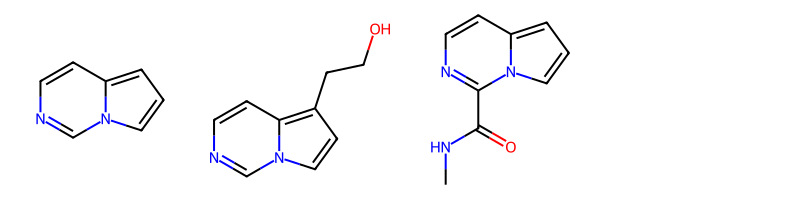

In [56]:
img = Draw.MolsToGridImage(
    [template] + ms,
    molsPerRow=4,  # 한 줄에 4개의 분자를 표시
    subImgSize=(200, 200),  # 각 분자 이미지의 크기
)

img

## 3D 구조를 닮은 2D 구조 생성
- AllChem.GenerateDepictionMatching3DStructure() 함수를 사용하면 그 3D 구조의 형태를 최대한 유지하는 2D 그림을 생성할 수 있다.

# 3D 구조 생성
수소 추가 (AddHs): 현실적인 분자 구조를 얻기 위해 가장 먼저 명시적으로 수소 원자를 추가해야 한다.

3D 구조 생성 (EmbedMolecule): 분자의 3D 좌표를 생성. RDKit은 기본적으로 ETKDG 알고리즘으로 별도의 최적화 없이도 상당히 정확한 3D 구조를 생성

(선택) 구조 최적화 (MMFFOptimizeMolecule): 생성된 3D 구조를 MMFF94라는 force field 이용해 에너지가 더 낮은 안정한 상태로 미세 조정(최적화) 가능. ETKDG 알고리즘의 성능이 좋아서 필수가 아니다.

In [57]:
from rdkit import Chem
from rdkit.Chem import AllChem

m = Chem.MolFromSmiles('C1CCC1OC')

m2 = Chem.AddHs(m)
AllChem.EmbedMolecule(m2)
AllChem.MMFFOptimizeMolecule(m2)

0

## 다중 3D 구조 생성 및 분석
여러 구조 생성 (EmbedMultipleConfs): numConfs 인자를 사용해 원하는 개수만큼의 3D 구조를 생성.

구조 정렬 (AlignMolConformers): 생성된 여러 구조를 비교하려면, 먼저 하나의 기준 구조에 맞춰 모두 정렬해야 한다..

구조 비교 (GetConformerRMS): 정렬된 두 구조가 얼마나 다른지 RMSD(Root Mean Square Deviation) 값을 계산하여 정량적으로 비교 가능.

(선택) 전체 구조 최적화 (MMFFOptimizeMoleculeConfs): 생성된 모든 3D 구조에 대해 한 번에 MMFF94 최적화를 수행.



In [58]:
cids = AllChem.EmbedMultipleConfs(m2,numConfs = 10)

rmslist = []
AllChem.AlignMolConformers(m2, RMSlist = rmslist)

rms = AllChem.GetConformerRMS(m2, 1, 9, prealigned = True)

res = AllChem.MMFFOptimizeMoleculeConfs(m2)

## 성능 향상
numThreads 인자를 설정해 멀티스레딩으로 작업 속도를 크게 향상.

In [59]:
cids = AllChem.EmbedMultipleConfs(m2, numConfs=10, numThreads=0)
res = AllChem.MMFFOptimizeMoleculeConfs(m2, numThreads=0)

3D 구조 생성은 매우 복잡한 작업. RDKit의 ETKDG 방법은 대부분의 목적에 충분히 훌륭한 결과를 제공하지만, 매우 정밀한 학술 연구나 전문적인 conformational analysis를 위해서는 전용 소프트웨어의 사용이 필요할 수도 있다.

# 저장 방식
- 분자 객체를 훨씬 빠르게 불러올 수 있는 두 가지 binary 저장 방식을 제공

## 파이썬 피클(Pickle)
pickle.dumps(mol): 분자 객체를 피클 형식의 바이트(bytes)로 변환.

pickle.loads(pkl): 피클 바이트로부터 분자 객체를 다시 복원.



In [60]:
import pickle
from rdkit import Chem

m = Chem.MolFromSmiles('c1ccncc1')

# 분자를 피클 형식으로 변환
pkl = pickle.dumps(m)

# 피클로부터 분자 복원
m2 = pickle.loads(pkl)
print(Chem.MolToSmiles(m2))
# 'c1ccncc1'

c1ccncc1


## RDKit 자체 바이너리 형식 사용
mol.ToBinary(): 분자 객체를 RDKit의 자체 바이너리 형식으로 변환

Chem.Mol(binStr): 바이너리 문자열로부터 분자 객체를 생성

In [61]:
# 분자를 바이너리 형식으로 변환
binStr = m.ToBinary()

# 바이너리로부터 분자 복원
m2 = Chem.Mol(binStr)
print(Chem.MolToSmiles(m2))
# 'c1ccncc1'

c1ccncc1


- 데이터셋을 반복적으로 사용하는 경우, 한 번 파싱한 후 그 결과를 pickle이나 바이너리 파일로 저장해두고 다음부터는 그 파일을 불러와 사용하는 것이 시간을 크게 절약하는 핵심적인 최적화 방법

# Drawing Molecules
## 기본 분자 그리기
- Draw.MolToFile(): 분자 객체 하나를 이미지 파일(.png, .svg 등)로 직접 저장
- Draw.MolsToGridImage(): 분자 리스트를 받아 하나의 그리드 이미지(PIL Image 객체)로 반환. 이 객체는 파일로 저장할 수 있다.

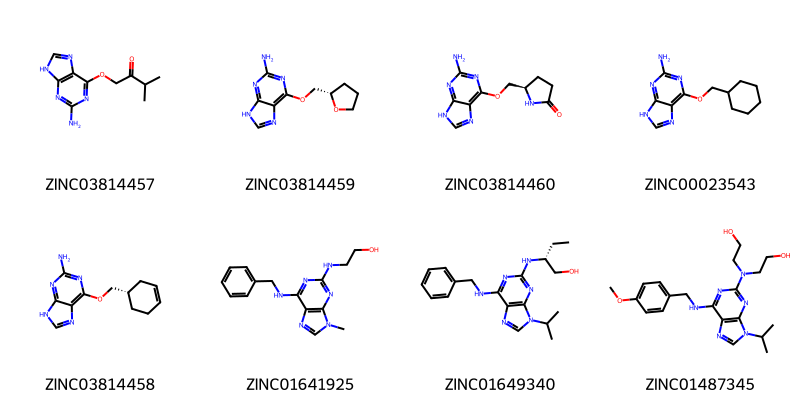

In [62]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from IPython.display import display

with Chem.SDMolSupplier('data/cdk2.sdf') as suppl:
  ms = [x for x in suppl if x is not None]
for m in ms:
  _ = AllChem.Compute2DCoords(m)

# 단일 분자 저장
Draw.MolToFile(ms[0], 'cdk2_mol1.png')

# 여러 분자 그리드로 만들어 파일 저장
img = Draw.MolsToGridImage(ms[:8], molsPerRow=4, subImgSize=(200, 200),
                           legends=[x.GetProp("_Name") for x in ms[:8]])
display(img)
# img.save('cdk2_molgrid.png')는 오류 발생

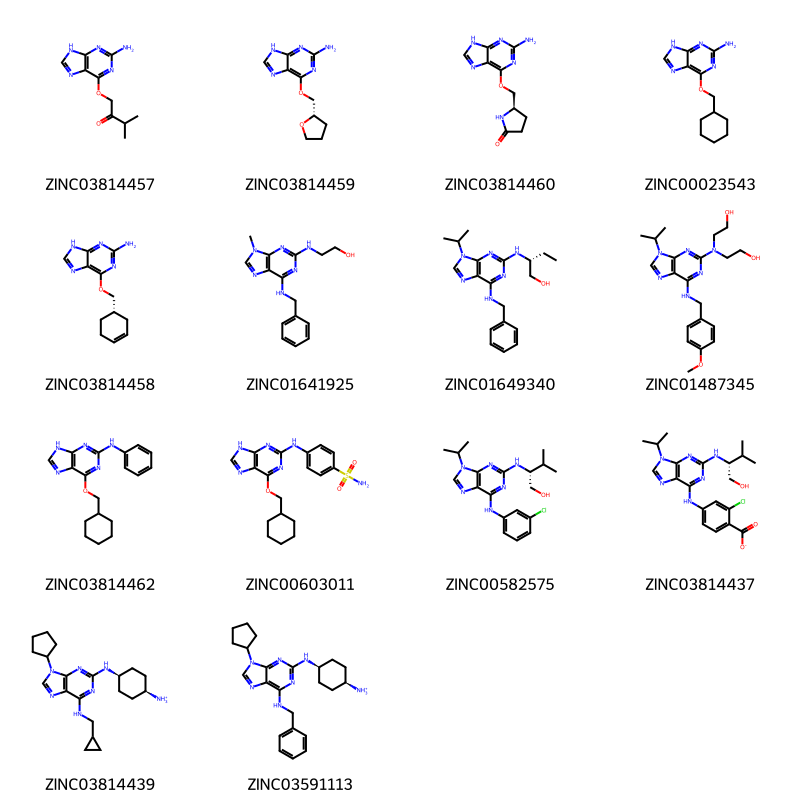

In [63]:
p = Chem.MolFromSmiles('[nH]1cnc2cncnc21')
subms = [x for x in ms if x.HasSubstructMatch(p)]
len(subms)
AllChem.Compute2DCoords(p)
for m in subms:
  _ = AllChem.GenerateDepictionMatching2DStructure(m,p)
img=Draw.MolsToGridImage(subms,molsPerRow=4,subImgSize=(200,200),legends=[x.GetProp("_Name") for x in subms])
display(img)

## 구조 정렬 및 강조
공통 구조에 맞춰 정렬: 여러 분자가 공통된 골격(template)을 가질 때, GenerateDepictionMatching2DStructure를 사용해 그리기 전에 모두 같은 방향으로 정렬할 수 있다. 이는 구조-활성 관계(SAR) 분석 등에서 가독성을 크게 높여준다.

특정 구조 강조: rdkit.Chem.Draw.rdMolDraw2D 모듈을 사용하면, substructure 검색 등으로 찾은 특정 원자(atom)나 결합(bond)에 색깔을 입혀 강조할 수 있다. highlightAtoms와 highlightBonds 인자에 강조할 원자/결합의 인덱스 리스트를 전달. highlightAtomColors, highlightBondColors를 사용하면 각 부분의 색상도 직접 지정할 수 있다.

In [64]:
from rdkit.Chem.Draw import rdMolDraw2D
# 특정 패턴에 매치되는 원자와 결합을 찾아 하이라이트하기
mol = Chem.MolFromSmiles('c1cc(F)ccc1Cl')
patt = Chem.MolFromSmarts('ClccccF')

hit_ats = list(mol.GetSubstructMatch(patt))
hit_bonds = []
for bond in patt.GetBonds():
   aid1 = hit_ats[bond.GetBeginAtomIdx()]
   aid2 = hit_ats[bond.GetEndAtomIdx()]
   hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())

# # SVG 또는 PNG 캔버스 생성
d = rdMolDraw2D.MolDraw2DSVG(500, 500)
rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats,
                                   highlightBonds=hit_bonds)
d.FinishDrawing()

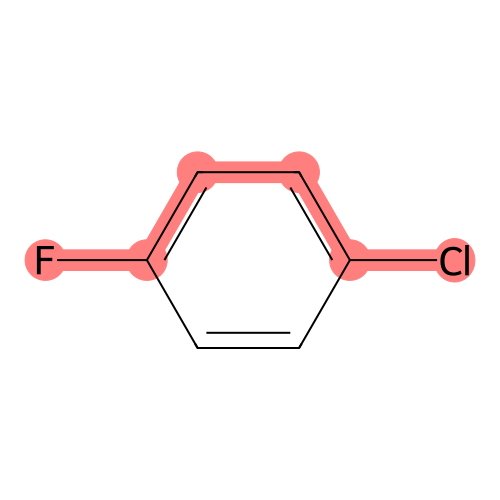

In [65]:
from IPython.display import SVG

# Get the SVG text from the drawing object and display it
svg_text = d.GetDrawingText()
display(SVG(svg_text))

In [66]:
# specify for individual atoms and bonds:
colours = [(0.8,0.0,0.8),(0.8,0.8,0),(0,0.8,0.8),(0,0,0.8)]
atom_cols = {}
for i, at in enumerate(hit_ats):
    atom_cols[at] = colours[i%4]
bond_cols = {}
for i, bd in enumerate(hit_bonds):
    bond_cols[bd] = colours[3 - i%4]

d = rdMolDraw2D.MolDraw2DCairo(500, 500)
rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats,
                                   highlightAtomColors=atom_cols,
                                   highlightBonds=hit_bonds,
                                   highlightBondColors=bond_cols)

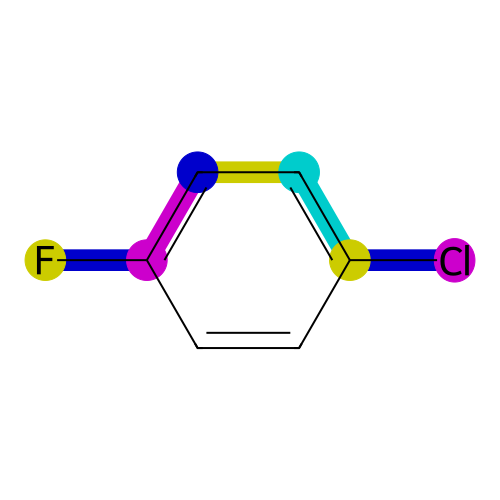

In [67]:
from IPython.display import Image, SVG

svg_text = d.GetDrawingText()
display(Image(svg_text))

## 주석 및 라벨 추가하기
자동 주석: d.drawOptions()를 통해 카이랄 중심의 R/S, 이중 결합의 E/Z, 원자 번호 등을 자동으로 추가.

사용자 정의 노트: 원자나 결합에 atomNote, bondNote 속성을 설정하여 간단한 텍스트 노트를 추가.

사용자 정의 라벨: _displayLabel 속성을 사용하면 R-그룹 치환기처럼 원자를 원하는 텍스트 라벨로 대체 가능. 이 라벨에는 <sub>(아래 첨자), <sup>(위 첨자) 태그를 사용한 서식 지정도 가능.

In [68]:
mol = Chem.MolFromSmiles(r'Cl[C@H](F)NC\C=C\C')

# R-그룹 라벨 설정
mol.GetAtomWithIdx(0).SetProp("_displayLabel", "R<sub>1</sub>")

# 그리기 옵션 설정
d = Draw.rdMolDraw2D.MolDraw2DCairo(250, 200)
d.drawOptions().addStereoAnnotation = True # R/S, E/Z 주석 추가
d.drawOptions().addAtomIndices = True      # 원자 번호 추가
d.DrawMolecule(mol)
d.FinishDrawing()
d.WriteDrawingText('annotated_molecule.png')

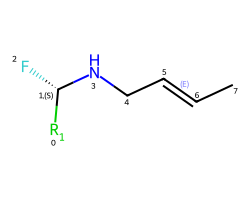

In [69]:
from IPython.display import Image, SVG

# Get the drawing text (PNG data from Cairo backend)
png_data = d.GetDrawingText()

# Display the PNG data using IPython.display.Image
display(Image(png_data))

In [70]:
smi = 'c1nc(*)ccc1* |$;;;R1;;;;R2$|'
mol = Chem.MolFromSmiles(smi)
mol.GetAtomWithIdx(3).GetProp("atomLabel")
'R1'
mol.GetAtomWithIdx(7).GetProp("atomLabel")
'R2'
d = rdMolDraw2D.MolDraw2DCairo(250, 250)
rdMolDraw2D.PrepareAndDrawMolecule(d,mol)
d.WriteDrawingText("./images/atom_labels_1.png")

[10:34:17] Failed to write PNG file ./images/atom_labels_1.png


## 원자 라벨 속성 비교


# Metadata in Molecule Images 이미지에서 분자 복원하기
## 단일 분자 복원
Chem.MolFromPNGString(): PNG에서 분자 객체를 복원

In [71]:
template = Chem.MolFromSmiles('c1nccc2n1ccc2')
AllChem.Compute2DCoords(template)

0

In [72]:
ms = [Chem.MolFromSmiles(smi) for smi in ('OCCc1ccn2cnccc12','C1CC1Oc1cc2ccncn2c1','CNC(=O)c1nccc2cccn12')]
_ = [AllChem.GenerateDepictionMatching2DStructure(m,template) for m in ms]
d = rdMolDraw2D.MolDraw2DCairo(250, 200)
d.DrawMolecule(ms[0])
d.FinishDrawing()

In [73]:
# png 데이터를 binary로 얻기
png = d.GetDrawingText()

In [74]:
# PNG binary로부터 분자 객체 복원
reconstructed_mol = Chem.MolFromPNGString(png)
Chem.MolToSmiles(reconstructed_mol)

'OCCc1c2ccncn2cc1'

## 여러 분자 복원
Chem.MolsFromPNGString(): MolsToGridImage로 생성된 것처럼 여러 분자가 포함된 이미지의 모든 분자 객체를 리스트로 한 번에 복원

In [75]:
from rdkit.Chem import Draw

ms = [Chem.MolFromSmiles(s) for s in ('CCO', 'c1ccccc1')]

# returnPNG=True 옵션으로 그리드 이미지의 PNG 바이너리 데이터 얻기
png = Draw.MolsToGridImage(ms, returnPNG=True)

# PNG로부터 분자 리스트 복원
mols = Chem.MolsFromPNGString(png)
for mol in mols:
    print(Chem.MolToSmiles(mol))
# 에러 이유를 모르겠다.

TypeError: No registered converter was able to produce a C++ rvalue of type std::basic_string<wchar_t, std::char_traits<wchar_t>, std::allocator<wchar_t> > from this Python object of type Image

# Substructure Searching
- 특정 분자 안에 원하는 화학적 패턴(substructure)이 존재하는지 검색하는 강력한 기능을 제공
- 이 검색 패턴은 주로 SMARTS 언어로 정의

##  기본 검색 방법
mol.HasSubstructMatch(pattern): 분자(mol) 안에 pattern이 존재하는지 여부만 확인하여 True 또는 False를 반환.

mol.GetSubstructMatch(pattern): 첫 번째로 발견된 match에 해당하는 원자들의 index를 tuple로 반환.

mol.GetSubstructMatches(pattern): 가능한 모든 매치를 찾아 각각의 원자 index tuple들을 담은 tuple을 반환.

In [76]:
# 검색 대상 분자 (phenol)
m = Chem.MolFromSmiles('c1ccccc1O')
# 검색할 패턴 (방향족탄소-방향족탄소-산소)
patt = Chem.MolFromSmarts('ccO')

# 패턴이 존재하는가?
print(m.HasSubstructMatch(patt))

# 첫 번째 매치는? (0, 5, 6번 원자가 매치됨)
print(m.GetSubstructMatch(patt))

# 모든 매치는? (두 가지 경우가 가능)
print(m.GetSubstructMatches(patt))

True
(0, 5, 6)
((0, 5, 6), (4, 5, 6))


## 분자 리스트 필터링
SDF 파일과 같은 분자 데이터베이스에서 원하는 부분 구조를 가진 분자들만 필터링

In [77]:
# 'c[NH1]' (지방족 탄소에 연결된 2차 아민) 패턴 정의
patt = Chem.MolFromSmarts('c[NH1]')

# SD 파일에서 패턴을 포함하는 분자만 matches 리스트에 저장
with Chem.SDMolSupplier('data/actives_5ht3.sdf') as suppl:
  matches = [mol for mol in suppl if mol.HasSubstructMatch(patt)]

len(matches)

22

## SMARTS vs. SMILES 쿼리
SMILES 쿼리: 원자의 종류와 연결성만 일치하면 match. aromatic 여부 등을 구분하지 않아 더 일반적인 검색.

SMARTS 쿼리: 원자의 종류뿐만 아니라, aliphatic(지방족)/aromatic, 결합 차수 등 더 정교하고 엄격한 조건으로 검색

- SMARTS를 사용하는 것이 표준적이고 권장되는 방법



In [78]:
m = Chem.MolFromSmiles('C1=CC=CC=C1OC') # Anisole

# SMILES 쿼리: 'COC' (탄소-산소-탄소)
# Anisole의 C(방향족)-O-C(지방족)도 매치됨
m.HasSubstructMatch(Chem.MolFromSmiles('COC'))

True

In [79]:
# SMARTS 쿼리: 'COC' (지방족탄소-산소-지방족탄소)
# Anisole의 한쪽 탄소는 방향족이므로 매치되지 않음
m.HasSubstructMatch(Chem.MolFromSmarts('COC'))

False

In [80]:
# SMARTS 쿼리: 'COc' (지방족탄소-산소-방향족탄소)
# Anisole 구조와 정확히 일치하므로 매치됨
m.HasSubstructMatch(Chem.MolFromSmarts('COc'))

True

## Stereochemistry in substructure matches
기본 동작: 입체화학 무시
- 옵션이 없으면 검색은 2D 연결성에만 초점



In [81]:
from rdkit import Chem

# 특정 카이랄 중심을 가진 분자
m = Chem.MolFromSmiles('CC[C@H](F)Cl')

# 동일한, 반대의, 비카이랄 쿼리 모두 True를 반환
m.HasSubstructMatch(Chem.MolFromSmiles('C[C@H](F)Cl'))  # True
m.HasSubstructMatch(Chem.MolFromSmiles('C[C@@H](F)Cl')) # True
m.HasSubstructMatch(Chem.MolFromSmiles('CC(F)Cl'))

True

## useChirality=True 옵션: 입체화학 고려
- 카이랄 중심의 입체 배열까지 정확하게 일치해야 한다.

In [82]:
# 동일한 입체화학을 가진 쿼리는 매치됨
m.HasSubstructMatch(Chem.MolFromSmiles('C[C@H](F)Cl'), useChirality=True)

True

In [83]:
# 반대의 입체화학을 가진 쿼리는 매치되지 않음
m.HasSubstructMatch(Chem.MolFromSmiles('C[C@@H](F)Cl'), useChirality=True)

False

## 비대칭 매칭 규칙
useChirality=True 사용 시 한 가지 중요한 비대칭 규칙
1.  비카이랄(non-chiral) 쿼리는 카이랄(chiral) 분자를 찾을 수 있다.
- 쿼리에 입체화학 정보가 없으면, 이는 "입체화학은 상관없다"는 의미로 작용하여 더 구체적인 대상(카이랄 분자)과 매치될 수 있다.

In [84]:
# 비카이랄 쿼리 'CC(F)Cl'는 카이랄 분자 m과 매치됨
m.HasSubstructMatch(Chem.MolFromSmiles('CC(F)Cl'), useChirality=True)

True

2. 카이랄(chiral) 쿼리는 비카이랄(non-chiral) 분자를 찾을 수 없다.
- 쿼리가 특정 입체화학을 요구하는데, 대상 분자에 해당 정보가 아예 없으면 조건을 만족시킬 수 없어 매치에 실패

In [85]:
# 비카이랄 분자
m2 = Chem.MolFromSmiles('CCC(F)Cl')
# 카이랄 쿼리는 비카이랄 분자 m2와 매치되지 않음
m2.HasSubstructMatch(Chem.MolFromSmiles('C[C@H](F)Cl'), useChirality=True)

False

## Atom Map Indices in SMARTS
- 복잡한 검색 패턴 내의 특정 원자들을 "태그"하거나 "북마크"하는 데 사용
- 전체 패턴이 매치되었을 때, 내가 관심 있는 특정 원자들이 어떤 것인지 쉽게 식별 가능

### Atom Map Indices
SMARTS 패턴 내에서 콜론(:)과 숫자를 사용해 원자에 번호를 붙이는 기능
- 예를 들어, [cH0:1][c:2]에서 첫 번째 탄소는 1번, 두 번째 탄소는 2번으로 태그

### 사용법 2단계 워크플로우
GetSubstructMatches()는 패턴의 모든 우너자에 대한 matching index를 반환하므로, tag된 원자들의 index만 골라내려면 2단계가 필요하다.

### 1단계: 패턴에서 맵핑 정보 추출하기
부분 구조 검색을 수행하기 전, 먼저 SMARTS 패턴 자체를 분석하여 "맵 번호"와 "패턴 내 원자 인덱스" 사이의 관계를 파악

In [86]:
# 1, 2, 3, 4번으로 태그된 원자가 포함된 SMARTS 패턴
qmol = Chem.MolFromSmarts('[cH0:1][c:2]([cH0])!@[CX3!r:3]=[NX2!r:4]')

# 맵 번호 -> 패턴 내 원자 인덱스로의 딕셔너리 생성
ind_map = {}
for atom in qmol.GetAtoms():
  map_num = atom.GetAtomMapNum() # 원자의 맵 번호 가져오기
  if map_num:
    ind_map[map_num] = atom.GetIdx()

# 맵 번호(1, 2, 3, 4) 순서대로 정렬된 원자 인덱스 리스트 생성
# 이 리스트는 나중에 매치 결과를 필터링하는 데 사용
map_list = [ind_map[x] for x in sorted(ind_map)]
map_list

[0, 1, 3, 4]

### 2단계: 매치된 원자 인덱스 선택
map_list를 사용해 실제 분자와의 매치 결과에서 우리가 태그했던 원자들의 인덱스만 순서대로 골라낼 수 있다.

In [87]:
mol = Chem.MolFromSmiles('Cc1cccc(C)c1C(C)=NC')

# GetSubstructMatches로 모든 가능한 매치를 찾음
for match in mol.GetSubstructMatches(qmol):
    # match 튜플에서 map_list에 해당하는 인덱스만 추출
    # match -> (1, 2, 6, 7, 8, 10) 과 같은 전체 매치 결과
    tagged_atoms = [match[i] for i in map_list]
    print(tagged_atoms)
# 태그된 원자들에 해당하는 인덱스가 출력

[1, 7, 8, 10]


## Advanced substructure matching
### 핵심 개념: 추가 최종 검사 (Extra Final Check)
SMARTS는 매우 강력하지만, "이 치환기에 있는 모든 원자는 탄소여야 한다"와 같은 동적인 규칙을 표현하기는 어렵다.

SubstructMatchParameters 객체와 setExtraFinalCheck() 메서드를 사용하면, SMARTS가 찾아낸 각각의 잠재적인 매치에 대해 사용자가 직접 만든 파이썬 함수(checker)를 실행하여 매치를 최종 승인하거나 거부할 수 있다.

### 작동 방식
RDKit이 SMARTS 패턴과 일치하는 부분 구조를 찾는다.

찾은 매치 정보(분자 객체, 매치된 원자 인덱스)를 사용자 정의 검사기 함수에 전달한다.

검사기 함수가 True를 반환하면 해당 매치를 최종 결과에 포함하고, False를 반환하면 버린다.

### 사용 방법
1. 검사기(Checker) 정의: (molecule, match_indices)를 인자로 받고, True 또는 False를 반환하는 함수나 호출 가능한 클래스를 생성

2. SubstructMatchParameters 설정: Chem.SubstructMatchParameters()로 파라미터 객체를 만들고, params.setExtraFinalCheck(checker)를 통해 위에서 만든 검사기를 등록

3. 검색 실행: GetSubstructMatches(pattern, params)처럼 검색 함수에 파라미터 객체를 함께 전달

### 목표
C1CCC1* (사이클로뷰테인 고리에 무언가 붙어있는 구조) 패턴을 검색하되, *에 연결된 치환기(sidechain)가 특정 조건을 만족하는 경우만 찾아낸다.



### SidechainChecker 클래스: 검사기 역할

초기화(__init__) 시, 검색 패턴(p)에서 queryType이라는 속성을 가진 원자(*)를 찾아 어떤 규칙('all_carbon' 또는 'alkyl')을 적용할지 기억

호출(__call__) 시, SMARTS 매치가 발견될 때마다 실행됩니다. 매치된 원자들 중 *에 해당하는 원자로부터 시작하여, 연결된 치환기 전체를 탐색

탐색하면서 치환기의 모든 원자가 주어진 규칙(예: '모든 원자가 탄소인가?')을 만족하는지 확인하고, 하나라도 만족하지 않으면 False를 반환하여 해당 매치를 탈락

In [88]:
from rdkit import Chem

class SidechainChecker(object):
  matchers = {
    'alkyl': lambda at: not at.GetIsAromatic(),
    'all_carbon': lambda at: at.GetAtomicNum() == 6
  }

  def __init__(self, query, pName="queryType"):
    # identify the atoms that have the properties we care about
    self._atsToExamine = [(x.GetIdx(), x.GetProp(pName)) for x in query.GetAtoms()
                          if x.HasProp(pName)]
    self._pName = pName

  def __call__(self, mol, vect):
    seen = [0] * mol.GetNumAtoms()
    for idx in vect:
      seen[idx] = 1
    # loop over the atoms we care about:
    for idx, qtyp in self._atsToExamine:
      midx = vect[idx]
      stack = [midx]
      atom = mol.GetAtomWithIdx(midx)
      # now do a breadth-first search from that atom, checking
      # all of its neighbors that aren't in the substructure
      # query:
      stack = [atom]
      while stack:
        atom = stack.pop(0)
        if not self.matchers[qtyp](atom):
          return False
        seen[atom.GetIdx()] = 1
        for nbr in atom.GetNeighbors():
          if not seen[nbr.GetIdx()]:
            stack.append(nbr)
    return True

In [89]:
# 기본 검색: C1CCC1* 패턴에 맞는 모든 경우를 찾습니다.
m = Chem.MolFromSmiles('C2NCC2CC1C(CCCC)C(OCCCC)C1c2ccccc2')
p = Chem.MolFromSmarts('C1CCC1*')
p.GetAtomWithIdx(4).SetProp("queryType", "all_carbon")
m.GetSubstructMatches(p)

((5, 6, 11, 17, 18), (5, 17, 11, 6, 7), (6, 5, 17, 11, 12), (6, 11, 17, 5, 4))

In [90]:
# all_carbon 검사 적용: 연결된 치환기의 모든 원자가 탄소인 경우만 남긴다. (예: OCCCC나 c2ccccc2 치환기는 탈락)
params = Chem.SubstructMatchParameters()
checker = SidechainChecker(p)
params.setExtraFinalCheck(checker)
m.GetSubstructMatches(p,params)

((5, 6, 11, 17, 18), (5, 17, 11, 6, 7))

In [91]:
# alkyl 검사 적용: 치환기의 모든 원자가 방향족이 아닌 경우만 남긴다. (예: CCCC나 OCCCC는 통과, c2ccccc2는 탈락)
p.GetAtomWithIdx(4).SetProp("queryType", "alkyl")
checker = SidechainChecker(p)
params.setExtraFinalCheck(checker)
m.GetSubstructMatches(p,params)

((5, 17, 11, 6, 7), (6, 5, 17, 11, 12), (6, 11, 17, 5, 4))

# Chemical Transformations
## 부분 구조 기반 변형
AllChem.DeleteSubstructs(mol, patt): 분자(mol)에서 패턴(patt)과 일치하는 부분 구조를 삭제합니다.

AllChem.ReplaceSubstructs(mol, patt, repl): 패턴(patt)과 일치하는 부분을 다른 분자(repl)로 교체합니다.

Chem.ReplaceSidechains(mol, core): 기준이 되는 코어(core) 구조를 남기고, 나머지 곁가지(sidechain)들을 제거한 후 연결 지점을 [*]로 표시합니다.

Chem.ReplaceCore(mol, core): ReplaceSidechains와 반대로, 코어(core)를 제거하고 곁가지들만 [*]와 함께 남깁니다. GetMolFrags() 함수와 함께 사용하면 각 곁가지를 개별 분자로 분리

In [92]:
m = Chem.MolFromSmiles('CC(=O)O')
patt = Chem.MolFromSmarts('C(=O)[OH]')
rm = AllChem.DeleteSubstructs(m,patt)
Chem.MolToSmiles(rm)

'C'

In [93]:
# patt와 일치하는 부분을 다른 분자로 교체
repl = Chem.MolFromSmiles('OC')
patt = Chem.MolFromSmarts('[$(NC(=O))]')
m = Chem.MolFromSmiles('CC(=O)N')
rms = AllChem.ReplaceSubstructs(m,patt,repl)
Chem.MolToSmiles(rms[0])

'COC(C)=O'

In [94]:
# 기준이 되는 core를 남기고 나머지 sidechain제거 한 후 연결 지점 표시
m1 = Chem.MolFromSmiles('BrCCc1cncnc1C(=O)O')
core = Chem.MolFromSmiles('c1cncnc1')
tmp = Chem.ReplaceSidechains(m1,core)
Chem.MolToSmiles(tmp)

'[1*]c1cncnc1[2*]'

In [95]:
# core를 제거하고 sidechain들만 남긴다.
tmp = Chem.ReplaceCore(m1,core)
Chem.MolToSmiles(tmp)
'[1*]CCBr.[2*]C(=O)O'

'[1*]CCBr.[2*]C(=O)O'

In [96]:
# 분리된 sidechain들을 개별 분자로 얻기
rs = Chem.GetMolFrags(tmp, asMols=True)
Chem.MolToSmiles(rs[0])

'[1*]CCBr'

## Murcko Decomposition
분자의 핵심 골격 구조를 추출하는 Murcko 분해 기능

MurckoScaffold.GetScaffoldForMol(mol): 분자에서 모든 sidechain을 제거하고, ring 구조와 ring 사이를 잇는 linker만으로 구성된 Murcko Scaffold를 생성한다.

MurckoScaffold.MakeScaffoldGeneric(scaffold): 추출된 scaffold를 모든 원자는 탄소로, 모든 결합은 단일 결합으로 변환하여 순수한 그래프 골격(framework)만 남긴다.

In [97]:
from rdkit.Chem.Scaffolds import MurckoScaffold

m = Chem.MolFromSmiles('Cc1c(N)cccc1C(=O)O')

# Murcko Scaffold 추출
core = MurckoScaffold.GetScaffoldForMol(m)
Chem.MolToSmiles(core)

'c1ccccc1'

In [98]:
# Generic Framework으로 변환
fw = MurckoScaffold.MakeScaffoldGeneric(core)
Chem.MolToSmiles(fw)

'C1CCCCC1'

## 최대 공통 부분 구조 (MCS)

Maximum Common Substructure
두 개 이상의 분자 간에 공통적으로 존재하는 가장 큰 부분 구조를 찾는 기능

FindMCS: 여러 분자 사이에서 가장 큰 **단일 연결 조각(single fragment)**의 공통 구조를 찾는다.

RascalMCES: 두 분자 사이에서, 여러 조각으로 나뉘어 있더라도 전체적으로 가장 큰 공통 구조(multi-fragment)를 찾을 수 있다.

## rdFMCS.FindMCS (단일 조각 MCS 찾기)
- 2개 이상의 분자들 사이에서 공통적으로 존재하는 가장 큰 **단일 연결 조각(single connected fragment)**을 찾습니다.
- FindMCS 함수는 분자 리스트를 받아 MCSResult 객체를 반환하며, 이 객체는 공통 구조의 원자/결합 수, SMARTS 패턴 등의 정보를 담는다.

In [100]:
from rdkit.Chem import rdFMCS

mol1 = Chem.MolFromSmiles("O=C(NCc1cc(OC)c(O)cc1)CCCC/C=C/C(C)C")
mol2 = Chem.MolFromSmiles("CC(C)CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC")
mols = [mol1, mol2]
res = rdFMCS.FindMCS(mols)

print(f"Bonds: {res.numBonds}, SMARTS: {res.smartsString}")

Bonds: 18, SMARTS: [#6]-[#6]-[#6]-[#6]-[#6]-[#6](=[#8])-[#7]-[#6]-[#6]1:[#6]:[#6](:[#6](:[#6]:[#6]:1)-[#8])-[#8]-[#6]


### 주요 옵션
atomCompare, bondCompare: 원자나 결합을 비교하는 규칙을 지정합니다. (예: CompareAny - 모든 원자/결합이 일치, CompareElements - 원소만 비교)

matchValences: True로 설정 시, 원자의 원자가(valence)까지 일치해야 매치됩니다.

ringMatchesRingOnly: True로 설정 시, 고리(ring)에 속한 결합은 다른 고리 결합과만 매치됩니다.

completeRingsOnly: True로 설정 시, 부분적으로만 일치하는 고리는 허용하지 않고, 고리 전체가 MCS에 포함되어야만 매치로 인정합니다.

timeout: 지정된 시간(초)이 지나면 검색을 중단하고 그때까지 찾은 최선의 결과를 반환합니다.

## rdRascalMCES.FindMCES
- RascalMCES는 정확히 2개의 분자 사이에서, 여러 조각으로 나뉠 수 있는 **다중 조각(multi-fragment)**의 최대 공통 구조를 찾습니다.
- 속도와 유사도 기반: RASCAL은 두 분자 간의 유사도(Johnson similarity)를 먼저 빠르게 예측하고, 이 값이 지정된 임계값(similarityThreshold)보다 낮으면 비용이 많이 드는 전체 계산을 건너뜁니다. 이 때문에 대규모 스크리닝에 더 효율적일 수 있습니다.
- 결합(Edge) 기반: 원자(atom)가 아닌 결합(bond/edge)을 중심으로 공통 구조를 찾습니다.

In [102]:
from rdkit.Chem import rdRascalMCES

mol1 = Chem.MolFromSmiles('Oc1cccc2C(=O)C=CC(=O)c12')
mol2 = Chem.MolFromSmiles('O1C(=O)C=Cc2cc(OC)c(O)cc12')

# 기본 임계값(0.7)이 너무 높아 결과가 없음
results = rdRascalMCES.FindMCES(mol1, mol2)
len(results)

0

In [103]:
# 임계값을 낮춰서 실행
opts = rdRascalMCES.RascalOptions()
opts.similarityThreshold = 0.5
results = rdRascalMCES.FindMCES(mol1, mol2, opts)

print(results[0].smartsString)

Oc1:c:c:c:c:c:1.[#6]=O


- similarityThreshold: 계산을 수행할지 결정하는 유사도 임계값 (기본값 0.7).
- minFragSize: 결과에 포함될 조각의 최소 크기를 지정하여, 의미 없는 작은 조각들을 필터링

# Fingerprinting and Molecular Similarity
- fingerprint는 분자의 구조적 특징을 0과 1로 구성된 bit vector와 같은 숫자 형태로 변환한 것
- 이를 통해 두 분자가 얼마나 유사한지를 빠르고 효율적으로 계산

## RDKit (Topological) Fingerprints
- 분자 내 모든 원자들의 path 정보를 기반으로 생성
1. 핑거프린트 생성기 만들기: AllChem.GetRDKitFPGenerator() 함수로 RDKit 핑거프린트 생성기를 만듭니다.

2. 핑거프린트 계산: 생성기의 GetFingerprint() 메서드를 사용해 각 분자를 핑거프린트(bit vector)로 변환합니다.

3. 유사도 계산: DataStructs 모듈의 함수를 사용해 두 핑거프린트 간의 유사도를 계산합니다. Tanimoto Similarity가 가장 널리 쓰이며, 0(전혀 다름)에서 1(동일함) 사이의 값을 가집니다.

In [104]:
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs

ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('CCO'), Chem.MolFromSmiles('COC')]

# 1. 생성기 만들기
fpgen = AllChem.GetRDKitFPGenerator()

# 2. 핑거프린트 계산
fps = [fpgen.GetFingerprint(x) for x in ms]

# 3. 유사도 계산 (Tanimoto)
sim = DataStructs.TanimotoSimilarity(fps[0], fps[1])
print(f"Tanimoto 유사도: {sim:.2f}")

Tanimoto 유사도: 0.60


- Tanimoto 외에도 Dice, Cosine, Sokal 등 다양한 유사도 측정 지표를 사용 가능

### Fingerprint parameter control
GetRDKitFPGenerator()를 호출할 때 인자로 전달

기본 파라미터:

- minPath: 1
- maxPath: 7 (최대 경로 길이)
- fpSize: 2048 (핑거프린트 크기)

In [105]:
# 최대 경로 길이를 2로, 핑거프린트 크기를 1024로 변경
fpgen_custom = AllChem.GetRDKitFPGenerator(maxPath=2, fpSize=1024)
fps_custom = [fpgen_custom.GetFingerprint(x) for x in ms]

# 파라미터가 달라졌으므로 유사도 값도 변함
sim_custom = DataStructs.TanimotoSimilarity(fps_custom[0], fps_custom[2])
print(f"변경된 파라미터에서의 유사도: {sim_custom:.2f}")

변경된 파라미터에서의 유사도: 0.50


# Atom Pairs and Topological Torsions
- RDKit은 분자 내 원자 쌍(atom pairs)이나 토션(torsion) 정보를 기반으로 하는 핑거프린트 생성 기능도 제공
## Atom-Pair Fingerprints
- 아톰-페어 핑거프린트는 분자 내 모든 원자 쌍에 대한 정보를 인코딩
- 각 쌍은 원자의 종류, 주변 원자 수, 그리고 두 원자 사이의 결합 거리(bond distance)로 정의

1. Sparse Count Vector(희소 개수 벡터)

atom-pair 종류가 매우 많아서, 기본적으로 존재하는 페어의 종류와 개수만 저장하는 sparse 형식 생성

In [106]:
from rdkit import Chem
from rdkit.Chem import AllChem

ms = [Chem.MolFromSmiles(smi) for smi in ('C1CCC1OCC', 'CC(C)OCC', 'CCOCC')]

# 아톰-페어 생성기
fpgen = AllChem.GetAtomPairGenerator()
# 희소 개수 핑거프린트 생성
pairFps = [fpgen.GetSparseCountFingerprint(x) for x in ms]

2. 높은 가독성

다른 핑거프린트와 달리, 특정 비트(bit)가 어떤 아톰-페어를 의미하는지 직접 확인 가능

In [107]:
from rdkit.Chem.AtomPairs import Pairs
# 558115번 비트에 대한 설명
Pairs.ExplainPairScore(558115)
# -> 이웃 1개, 파이전자 0개인 탄소(C)가 3개 결합만큼 떨어진, 이웃 2개, 파이전자 0개인 탄소(C) 쌍

(('C', 1, 0), 3, ('C', 2, 0))

3. 유사도 측정

atom-pair fingerprint 간의 유사도는 주로 Dice Similarity 사용

In [108]:
from rdkit import DataStructs
DataStructs.DiceSimilarity(pairFps[0], pairFps[1])

0.3333333333333333

4. 비트 벡터 형식:

fpgen.GetFingerprint(x)를 사용하면 일반적인 고정 길이 비트 벡터 형식으로도 얻을 수 있습니다.

## Topological Torsion Fingerprints
분자 내에 연속적으로 연결된 네 개의 원자 경로(torsion) 정보를 기반으로 생성


사용법

- AllChem.GetTopologicalTorsionGenerator()로 생성기를 만듭니다.
- 기본적으로 희소 개수 벡터(GetSparseCountFingerprint)로 생성됩니다.
- 유사도 측정에는 주로 DiceSimilarity가 사용됩니다.



In [109]:
# 토션 핑거프린트 생성기
fpgen = AllChem.GetTopologicalTorsionGenerator()
tts = [fpgen.GetSparseCountFingerprint(x) for x in ms]

# 유사도 계산
DataStructs.DiceSimilarity(tts[0], tts[1])

0.16666666666666666

# Morgan Fingerprints (Circular Fingerprints)
circular fingerprints 또는 ECFP/FCFP type fingerprint로 더 잘 알려져 있으며, RDKit에서 가장 널리 사용되는 핑거프린트 중 하나

## 핵심 개념: 원자 환경 🌀
Morgan 핑거프린트는 각 원자를 중심으로, 지정된 반지름(radius) 내에 포함되는 원자들의 "환경"을 식별하여 생성. 예를 들어 radius=2는 각 원자로부터 2개 결합만큼 떨어진 곳까지의 모든 원자와 결합 정보를 포함하여 하나의 feature로 만듭니다.

참고: ECFP4 와 같은 핑거프린트에서 숫자 '4'는 직경(diameter)을 의미합니다. 따라서 RDKit Morgan 핑거프린트에서 radius=2로 설정하는 것이 ECFP4와 거의 동일한 환경 크기를 의미.

## 기본 사용법
1. 생성기 만들기: AllChem.GetMorganGenerator(radius=N)로 원하는 반지름의 생성기를 만듭니다.

2. 핑거프린트 계산: 다른 핑거프린트와 마찬가지로 희소 개수 벡터(GetSparseCountFingerprint)나 일반 비트 벡터(GetFingerprint) 형식으로 생성할 수 있습니다.

In [110]:
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs

m1 = Chem.MolFromSmiles('Cc1ccccc1')
m2 = Chem.MolFromSmiles('Cc1ncccc1')

# 1. 반지름 2의 Morgan 핑거프린트 생성기 만들기
fpgen = AllChem.GetMorganGenerator(radius=2)

# 2. 비트 벡터 핑거프린트 생성
fp1 = fpgen.GetFingerprint(m1)
fp2 = fpgen.GetFingerprint(m2)

# 3. 유사도 계산
DataStructs.DiceSimilarity(fp1, fp2)

0.5185185185185185

## 원자 불변량(Atom Invariants): ECFP vs. FCFP 스타일

Morgan 핑거프린트의 가장 큰 특징은 **원자 불변량(atom invariant)**을 어떻게 정의하느냐에 따라 핑거프린트의 "스타일"이 달라진다는 점입니다. 원자 불변량은 각 원자를 처음에 어떻게 인식할지에 대한 규칙입니다.

기본 (ECFP 스타일): 기본 설정은 원자의 종류, 결합 수 등 연결성 정보를 사용합니다. 이는 ECFP(Extended-Connectivity Fingerprints) 계열과 유사하며, 일반적인 구조적 유사성을 비교하는 데 적합합니다.

특징 기반 (FCFP 스타일): AllChem.GetMorganFeatureAtomInvGen()를 사용하면, 원자를 수소결합 주개/받개, 방향족 등 **약리적 특징(pharmacophoric features)**으로 인식합니다. 이는 FCFP(Feature-Class Fingerprints) 계열과 유사하며, 약물 후보물질 스크리닝처럼 기능적 유사성이 중요할 때 유용합니다.

In [111]:
# 피리딘(pyridine)과 푸란(furan)
m1 = Chem.MolFromSmiles('c1ccccn1')
m2 = Chem.MolFromSmiles('c1ccco1')

# 기본(ECFP 스타일) 핑거프린트의 유사도
fpgen = AllChem.GetMorganGenerator(radius=2)
fp1 = fpgen.GetFingerprint(m1); fp2 = fpgen.GetFingerprint(m2)
DataStructs.DiceSimilarity(fp1, fp2)

0.23529411764705882

In [112]:
# 특징(FCFP 스타일) 핑거프린트의 유사도
invgen = AllChem.GetMorganFeatureAtomInvGen()
ffpgen = AllChem.GetMorganGenerator(radius=2, atomInvariantsGenerator=invgen)
ffp1 = ffpgen.GetFingerprint(m1); ffp2 = ffpgen.GetFingerprint(m2)
DataStructs.DiceSimilarity(ffp1, ffp2)
# (둘 다 수소결합 받개 특징이 있어 유사도 높게 나옴)

0.9411764705882353

## 사용자 정의 핑거프린트 🎨
원자 불변량을 직접 제공하여 핑거프린트를 세밀하게 제어할 수도 있습니다.

customAtomInvariants: GetFingerprint() 호출 시 이 인자에 숫자 리스트를 제공하면, 각 원자를 해당 숫자로 인식하여 핑거프린트를 생성합니다. 예를 들어 모든 원자에 1을 부여하면, 원소의 종류를 무시하고 순수하게 분자의 **위상(topology)**만을 비교하게 됩니다.

useBondTypes=False: 생성기에 이 옵션을 주면 단일, 이중, 방향족 등 결합의 종류를 무시하고 핑거프린트를 생성합니다.

In [113]:
m1 = Chem.MolFromSmiles('Cc1ccccc1')
m3 = Chem.MolFromSmiles('CC1CCCCC1') # m1과 위상은 같지만, 결합 종류가 다름

# 원자 종류와 결합 종류를 모두 무시하고 순수 위상만 비교
fpgen = AllChem.GetMorganGenerator(radius=2, useBondTypes=False)
fp1 = fpgen.GetFingerprint(m1, customAtomInvariants=[1]*m1.GetNumAtoms())
fp3 = fpgen.GetFingerprint(m3, customAtomInvariants=[1]*m3.GetNumAtoms())

# 두 핑거프린트가 완전히 동일함
fp1 == fp3

True

# MACCS Keys
166개의 공개된 화학적 특징을 나타내는 SMARTS 패턴 기반 fingerprint

각 비트(bit)는 "분자 내에 3개 이상의 산소 원자가 있는가?" 와 같은 특정 화학적 특징의 유무를 나타냅니다.

## 사용법
MACCS 키는 다른 핑거프린트와 달리 FingerprintGenerator를 사용하지 않고, rdkit.Chem.MACCSkeys 모듈의 GenMACCSKeys() 함수를 직접 호출하여 생성

In [114]:
from rdkit import Chem
from rdkit.Chem import MACCSkeys, DataStructs

ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('CCO'), Chem.MolFromSmiles('COC')]

# 1. GenMACCSKeys 함수로 핑거프린트 생성
fps = [MACCSkeys.GenMACCSKeys(x) for x in ms]

# 2. 유사도 계산
sim = DataStructs.TanimotoSimilarity(fps[0], fps[1])
print(f"Tanimoto 유사도: {sim:.2f}")

Tanimoto 유사도: 0.50


# Explaining bits from fingerprints
fingerprint는 특정 bit가 분자의 어떤 부분 구조에 의해 생성되었는지 추적하고 해석하는 매우 유용하다. RDKit은  AdditionalOutput 객체를 사용하여 이 정보를 얻는 방법을 제공

코딩 파트너

생각하는 과정 표시
핑거프린트에서 특정 비트(bit)가 분자의 어떤 부분 구조에 의해 생성되었는지 추적하고 해석하는 것은 매우 유용합니다. RDKit은 AdditionalOutput 객체를 사용하여 이 정보를 얻는 방법을 제공합니다.

## 일반적인 워크플로우
어떤 종류의 핑거프린트든 비트 정보를 얻는 과정은 대체로 동일합니다.

1. AdditionalOutput 객체 생성: ao = AllChem.AdditionalOutput()

2. 수집할 정보 설정: 핑거프린트 종류에 맞는 정보 수집 함수를 호출합니다.

- Morgan: ao.CollectBitInfoMap()
- RDKit Topological: ao.CollectBitPaths()

3. 핑거프린트 생성 시 전달: Get...Fingerprint 함수에 additionalOutput=ao 인자를 추가합니다.

4. 결과 확인: ao 객체에서 GetBitInfoMap() 또는 GetBitPaths()를 호출하여 결과를 얻습니다.

## Morgan 핑거프린트 비트 설명하기 🗺️
Morgan 핑거프린트는 어떤 원자 환경이 비트를 생성했는지에 대한 정보를 제공합니다.

정보의 형태:

GetBitInfoMap()은 딕셔너리를 반환합니다. 각 키는 비트 ID이며, 값은 (중심 원자 인덱스, 반지름) 튜플의 리스트입니다.

해석 방법:

GetBitInfoMap()으로 특정 비트를 생성한 (원자 인덱스, 반지름)을 찾습니다.

Chem.FindAtomEnvironmentOfRadiusN() 함수로 해당 원자 환경에 포함된 결합들을 찾습니다.

Chem.MolFragmentToSmiles() 등을 사용해 이 환경을 사람이 읽을 수 있는 SMILES 문자열로 변환합니다. rootedAtAtom 옵션을 사용하면 중심 원자부터 SMILES를 생성하여 더 이해하기 쉽습니다.

In [115]:
from rdkit import Chem
from rdkit.Chem import AllChem

m = Chem.MolFromSmiles('c1cccnc1C')
fpgen = AllChem.GetMorganGenerator(radius=2)
ao = AllChem.AdditionalOutput()
ao.CollectBitInfoMap() # 1. 정보 수집 설정
fp = fpgen.GetSparseCountFingerprint(m, additionalOutput=ao) # 2. 생성 시 전달

info = ao.GetBitInfoMap() # 3. 결과 확인
bit_id = 4048591891
center_atom, radius = info[bit_id][0] # (5, 2)

# 4. 해당 환경을 SMILES로 변환하여 '설명'
env = Chem.FindAtomEnvironmentOfRadiusN(m, radius, center_atom)
atoms = set()
for bidx in env:
    atoms.add(m.GetBondWithIdx(bidx).GetBeginAtomIdx())
    atoms.add(m.GetBondWithIdx(bidx).GetEndAtomIdx())

Chem.MolFragmentToSmiles(m, atomsToUse=list(atoms), bondsToUse=env, rootedAtAtom=center_atom)

'c(C)(cc)nc'

## RDKit 핑거프린트 비트 설명하기
RDKit의 토폴로지컬 핑거프린트는 어떤 **결합 경로(bond path)**가 비트를 생성했는지에 대한 정보를 제공합니다.

정보의 형태: GetBitPaths()는 딕셔너리를 반환합니다. 각 키는 비트 ID이며, 값은 결합 인덱스로 이루어진 경로 튜플들의 튜플입니다.

해석 방법:

GetBitPaths()로 특정 비트를 생성한 결합 경로를 찾습니다.

이 결합 경로를 구성하는 원자들과 결합들을 Chem.MolFragmentToSmiles()로 전달하여 SMILES로 변환합니다.

In [116]:
m = Chem.MolFromSmiles('CCO')
fpgen = AllChem.GetRDKitFPGenerator(numBitsPerFeature=1) # 각 경로가 하나의 비트만 생성하도록 설정
ao = AllChem.AdditionalOutput()
ao.CollectBitPaths()
fp = fpgen.GetSparseCountFingerprint(m, additionalOutput=ao)

paths = ao.GetBitPaths()
bit_id = 1524090560
bond_path = paths[bit_id][0] # (0, 1)

atoms = set()
for bidx in bond_path:
    atoms.add(m.GetBondWithIdx(bidx).GetBeginAtomIdx())
    atoms.add(m.GetBondWithIdx(bidx).GetEndAtomIdx())

Chem.MolFragmentToSmiles(m, atomsToUse=list(atoms), bondsToUse=bond_path)
# (이 경우 분자 전체 경로)

'CCO'

# Generating images of fingerprint bits
핑거프린트의 특정 비트가 분자의 어떤 부분 구조(환경)에 의해 생성되었는지 직접 이미지로 그려볼 수 있습니다.

Draw.DrawMorganBit(mol, bitId, bitInfo): Morgan 핑거프린트의 특정 비트에 해당하는 원자 환경을 그립니다.

Draw.DrawRDKitBit(mol, bitId, bitInfo): RDKit 토폴로지컬 핑거프린트의 특정 비트에 해당하는 결합 경로를 그립니다.

이 함수들을 사용하려면, 먼저 AdditionalOutput 객체를 이용해 핑거프린트를 생성할 때 비트 정보(bitInfo)를 함께 수집해야 합니다.

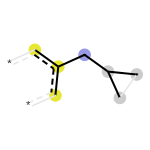

In [118]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw

mol = Chem.MolFromSmiles('c1ccccc1CC1CC1')

# Morgan 핑거프린트 비트 그리기
fpgen = AllChem.GetMorganGenerator(radius=2)
ao = AllChem.AdditionalOutput()
ao.CollectBitInfoMap()
fp = fpgen.GetFingerprint(mol, additionalOutput=ao)
bi = ao.GetBitInfoMap()

# 872번 비트에 해당하는 환경을 그림
img_morgan = Draw.DrawMorganBit(mol, 872, bi)
img_morgan
# 파란색은 환경의 중심 원자를, 노란색은 방향족 원자를 나타냅니다.

## Picking Diverse Molecules Using Fingerprints
큰 분자 집합에서 구조적으로 서로 다른, 즉 **다양성(diversity)**이 높은 분자들만 일부 선택하고 싶을 때 rdkit.SimDivFilters 모듈을 사용합니다. 가장 효율적인 방법은 MaxMin 알고리즘입니다.

1. 핑거프린트 생성: 선택할 분자 전체에 대해 핑거프린트(주로 Morgan 비트 벡터)를 계산합니다.

3. Picker 생성: MaxMinPicker()로 선택 도구를 만듭니다.

3. 다양한 분자 선택: picker.LazyBitVectorPick()에 핑거프린트 리스트와 선택할 개수를 전달하여, 다양성이 높은 분자들의 인덱스를 얻습니다.

In [122]:
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=3)
from rdkit import DataStructs
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker
with Chem.SDMolSupplier('data/actives_5ht3.sdf') as suppl:
  ms = [x for x in suppl if x is not None]
fps = [fpgen.GetFingerprint(x) for x in ms]
# ms: 분자 리스트, fps: 핑거프린트 리스트
nfps = len(fps)

# MaxMin 알고리즘으로 10개의 다양한 분자 인덱스 선택
picker = MaxMinPicker()
pickIndices = picker.LazyBitVectorPick(fps, nfps, 3, seed=23)

# 인덱스를 사용해 실제 분자 리스트 만들기
picks = [ms[x] for x in pickIndices]
picks

In [123]:
# 비트 벡터가 아닌 핑거프린트의 경우, LazyPick 함수와 직접 정의한 거리 계산 함수를 사용하여 동일한 작업을 수행할 수 있습니다.
fps = [fpgen.GetSparseCountFingerprint(x) for x in ms]
def distij(i,j,fps=fps):
  return 1-DataStructs.DiceSimilarity(fps[i],fps[j])
picker = MaxMinPicker()
pickIndices = picker.LazyPick(distij,nfps,10,seed=23)
list(pickIndices)

[93, 109, 154, 6, 95, 135, 151, 61, 137, 139]

# 유사도 맵 생성하기 (Similarity Maps)
유사도 맵은 두 분자 간의 유사도에 각 원자가 얼마나 기여했는지를 색상으로 시각화하는 방법입니다.

rdkit.Chem.Draw.SimilarityMaps 모듈의 GetSimilarityMapForFingerprint() 함수를 사용합니다.

1. 분자 준비: 비교할 분자(mol)와 기준 분자(refmol)를 준비합니다.

2. 맵 생성: GetSimilarityMapForFingerprint 함수에 두 분자, 사용할 핑거프린트 생성 함수(예: SimilarityMaps.GetMorganFingerprint), 그리고 RDKit 도면 객체를 전달합니다.

In [126]:
from rdkit import Chem
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
refmol = Chem.MolFromSmiles('CCCN(CCCCN1CCN(c2ccccc2OC)CC1)Cc1ccc2ccccc2c1')

from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
fp = SimilarityMaps.GetAPFingerprint(mol, fpType='normal')
fp = SimilarityMaps.GetTTFingerprint(mol, fpType='normal')
fp = SimilarityMaps.GetMorganFingerprint(mol, fpType='bv')


[11:54:43] DEPRECATION WARNING: please use AtomPairGenerator
[11:54:43] DEPRECATION WARNING: please use TopologicalTorsionGenerator
[11:54:43] DEPRECATION WARNING: please use MorganGenerator


In [127]:
d2d = Draw.MolDraw2DCairo(400, 400)
_, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint, d2d)

[11:54:52] DEPRECATION WARNING: please use MorganGenerator
[11:54:52] DEPRECATION WARNING: please use MorganGenerator


In [128]:
from rdkit import DataStructs
_, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, lambda m,idx: SimilarityMaps.GetMorganFingerprint(m, atomId=idx, radius=1, fpType='count'), d2d, metric=DataStructs.TanimotoSimilarity)

[11:55:05] DEPRECATION WARNING: please use MorganGenerator
[11:55:05] DEPRECATION WARNING: please use MorganGenerator


In [129]:
weights = SimilarityMaps.GetAtomicWeightsForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint)
print(["%.2f " % w for w in weights])

['0.05 ', '0.07 ', '0.05 ', '0.08 ', '0.05 ', '0.06 ', '0.03 ', '0.04 ', '-0.01 ', '-0.04 ', '-0.03 ', '-0.05 ', '0.01 ', '0.03 ', '0.07 ', '0.10 ', '0.12 ', '0.11 ', '0.09 ', '0.10 ', '0.09 ', '0.06 ', '0.03 ', '0.02 ', '-0.01 ', '-0.05 ', '0.00 ', '0.00 ', '-0.03 ', '0.02 ', '0.09 ', '0.11 ', '-0.04 ', '0.04 ']


[11:55:35] DEPRECATION WARNING: please use MorganGenerator
[11:55:35] DEPRECATION WARNING: please use MorganGenerator


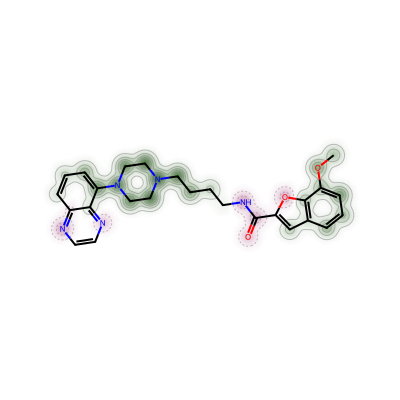

In [132]:
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import Image, display

# Assuming mol, weights, and d2d are already defined from previous cells

_ = SimilarityMaps.GetSimilarityMapFromWeights(mol, weights, d2d)

# Get the drawing text (PNG data from Cairo backend)
png_data = d2d.GetDrawingText()

# Display the PNG data using IPython.display.Image
display(Image(png_data))

# Descriptor Calculation
RDKit은 분자의 물리화학적 특성을 나타내는 200개 이상의 디스크립터를 계산할 수 있습니다.
## 디스크립터 계산
rdkit.Chem.Descriptors 모듈을 통해 개별 디스크립터를 계산하거나, CalcMolDescriptors 함수로 모든 디스크립터를 한 번에 계산할 수 있습니다.



In [133]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas

m = Chem.MolFromSmiles('c1ccccc1C(=O)O')

# 개별 디스크립터 계산
print(f"TPSA: {Descriptors.TPSA(m)}")
print(f"MolLogP: {Descriptors.MolLogP(m)}")

# 모든 디스크립터를 한 번에 계산하여 pandas DataFrame으로 만들기
mols = [Chem.MolFromSmiles(smi) for smi in ('CCO', 'c1ccccc1C(=O)O')]
descrs = [Descriptors.CalcMolDescriptors(mol) for mol in mols]
df = pandas.DataFrame(descrs)

TPSA: 37.3
MolLogP: 1.3848


Gasteiger 부분 전하와 같은 일부 속성은 AllChem.ComputeGasteigerCharges(mol) 함수를 통해 계산되며, 각 원자에 속성으로 저장됩니다.

## 디스크립터 시각화
유사도 맵(Similarity Maps)을 이용하면, 각 원자가 전체 디스크립터 값에 얼마나 기여하는지를 시각적으로 표현할 수 있습니다. 이는 Gasteiger 전하, LogP 기여도(Crippen contributions) 등 원자별로 분해 가능한 디스크립터에 유용합니다.

In [137]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
AllChem.ComputeGasteigerCharges(mol)
contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]
d2d = Draw.MolDraw2DCairo(400, 400)
_ = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, d2d, colorMap='jet', contourLines=10)

In [ ]:
# Or for the Crippen contributions to logP:
from rdkit.Chem import rdMolDescriptors
contribs = rdMolDescriptors._CalcCrippenContribs(mol)
_ = SimilarityMaps.GetSimilarityMapFromWeights(mol,[x for x,y in contribs], d2d, colorMap='jet', contourLines=10)

## Chemical Reactions
RDKit은 SMARTS나 MDL rxn 파일 형식으로 정의된 화학 반응을 분자에 적용하여 생성물을 예측할 수 있습니다.

## 반응 정의 및 실행
AllChem.ReactionFromSmarts(reaction_smarts): [reactant:1]>>[product:1] 형식의 SMARTS로 반응을 정의합니다. 콜론(:)으로 표시된 아톰 맵핑은 원자가 반응 전후에 어떻게 이동하고 변하는지를 지정하는 핵심 요소입니다.

rxn.RunReactants((reactant1, reactant2, ...)): 정의된 반응(rxn)에 반응물 튜플을 적용하여 생성물 튜플을 얻습니다. 하나의 반응이 여러 가능한 경로를 가질 수 있으므로, 결과는 생성물 튜플들의 튜플 ((prod1,), (prod2,), ...) 형태로 반환됩니다.

## 생성물 처리
고유 생성물 얻기: 여러 매핑으로 인해 동일한 생성물이 중복 생성될 수 있습니다. canonical SMILES를 딕셔너리의 키로 사용하면 고유한 생성물만 쉽게 필터링할 수 있습니다.

Sanitization: 반응으로 생성된 분자는 원자가나 방향족성 등이 올바르지 않을 수 있습니다. 따라서 추가 분석 전에 반드시 Chem.SanitizeMol(mol) 함수로 "정리"해주어야 합니다.

In [141]:
# 아마이드 결합 형성 반응 정의
rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])-[OD1].[N!H0:3]>>[C:1](=[O:2])[N:3]')
reactants = (Chem.MolFromSmiles('CC(=O)O'), Chem.MolFromSmiles('NC'))

# 반응 실행
ps = rxn.RunReactants(reactants)
product_smi = Chem.MolToSmiles(ps[0][0])
product_smi

'CNC(C)=O'

## Drawing Chemical Reactions
MolDraw2D를 사용해 화학 반응을 시각적으로 표현할 수 있습니다.

d2d.DrawReaction(rxn): 반응식을 아톰 맵 번호와 함께 그립니다.

d2d.DrawReaction(rxn, highlightByReactant=True): 생성물의 원자들이 어떤 반응물로부터 유래했는지 다른 색으로 강조하여 표시해 줍니다.

PNG 메타데이터: 분자 그림과 마찬가지로, 반응을 그린 PNG 이미지에도 메타데이터가 포함되어 AllChem.ReactionFromPNGString() 함수로 반응 객체를 다시 복원할 수 있습니다.

## Protecting Atoms
때로는 반응 조건(SMARTS)이 너무 일반적이어서 원하지 않는 원자까지 반응에 참여하는 경우가 있습니다. _protected 속성을 사용하면 특정 원자가 반응에 참여하지 않도록 "보호"할 수 있습니다.

1. 보호하고 싶은 원자를 부분 구조 검색 등으로 찾습니다.

2. 해당 원자에 atom.SetProp('_protected', '1') 코드로 속성을 설정합니다.

3. RunReactants를 실행하면, RDKit은 _protected 속성이 설정된 원자를 포함하는 매치를 자동으로 무시합니다.

In [143]:
rxn = AllChem.ReactionFromRxnFile('data/AmideBond.rxn')
acid = Chem.MolFromSmiles('CC(=O)O')
base = Chem.MolFromSmiles('CC(=O)NCCN')
ps = rxn.RunReactants((acid,base))
len(ps)
Chem.MolToSmiles(ps[0][0])
Chem.MolToSmiles(ps[1][0])

'CC(=O)NCCNC(C)=O'

In [144]:
# 아마이드 질소(N)를 보호하기 위한 패턴
amidep = Chem.MolFromSmarts('[N;$(NC=[O,S])]')
# 아마이드 질소를 찾아 '_protected' 속성 설정
for match in base.GetSubstructMatches(amidep):
    base.GetAtomWithIdx(match[0]).SetProp('_protected','1')

In [146]:
# 이제 반응을 실행하면 보호된 아마이드 질소 대신 아민 질소만 반응함
ps = rxn.RunReactants((acid,base))
len(ps)
# (원치 않는 부반응이 일어나지 않음)

1

In [147]:
Chem.MolToSmiles(ps[0][0])

'CC(=O)NCCNC(C)=O'

## 분자 분해 알고리즘
분자를 합성적으로 의미 있는 작은 조각으로 분해하는 두 가지 주요 알고리즘

### Recap (계층적 분해)
Recap은 일반적인 실험실 반응을 모방한 규칙에 따라 분자를 분해하고, 그 분해 과정을 계층(hierarchy) 구조로 기록합니다.

- Recap.RecapDecompose(mol)는 RecapHierarchyNode라는 트리 구조의 객체를 반환합니다.

- 이 객체의 children 속성을 통해 한 단계 아래의 조각들을, GetLeaves() 메서드를 통해 최종적으로 남은 가장 작은 조각들을 확인할 수 있습니다.

###  BRICS (규칙 기반 분해 및 재조합)
BRICS는 합성적으로 절단 가능한 결합을 기준으로 분자를 분해하는 또 다른 알고리즘입니다.

- BRICS.BRICSDecompose(mol): 분자를 분해하여 고유한 조각들의 SMILES를 set 형태로 반환합니다. 이때 생성되는 더미 원자(*)에는 어떤 규칙으로 절단되었는지를 나타내는 태그가 붙습니다.

- BRICS.BRICSBuild(fragments): BRICSDecompose로 얻은 조각들을 다시 조합하여 새로운 분자들을 생성하는 **생성기(generator)**를 반환합니다. 이 기능은 조합 라이브러리(combinatorial library)를 만드는 데 유용합니다.

## 사용자 지정 분자 분해 ✂️
Chem.FragmentOnBonds 함수를 사용하면 사용자가 직접 지정한 특정 결합들을 절단하여 분자를 분해할 수 있습니다.

1. 결합 찾기: 부분 구조 검색 등 원하는 방법으로 절단할 결합들의 인덱스 리스트를 만듭니다. (예: [!R][R] SMARTS는 고리 원자와 비고리 원자 사이의 결합을 찾습니다.)

2. 분자 분해: Chem.FragmentOnBonds(mol, bond_indices) 함수에 분자와 결합 인덱스 리스트를 전달합니다.

3. 결과: 새로운 분자 객체가 반환됩니다. dummyLabels 인자를 사용하면 이 더미 원자에 원하는 라벨을 붙여 절단 지점을 구분할 수 있습니다.

In [149]:
m = Chem.MolFromSmiles('CC1CC(O)C1CCC1CC1')

# 고리와 비고리 사이의 결합 찾기
bis = m.GetSubstructMatches(Chem.MolFromSmarts('[!R][R]'))
bs = [m.GetBondBetweenAtoms(x,y).GetIdx() for x,y in bis]

# 지정된 결합들을 절단
nm = Chem.FragmentOnBonds(m, bs)
Chem.MolToSmiles(nm, True)

'*C1CC([4*])C1[6*].[1*]C.[3*]O.[5*]CC[8*].[7*]C1CC1'

## 화학적 특징과 파마코포어 ✨
화학적 특징 찾기
RDKit은 SMARTS 기반의 규칙 파일(.fdef)을 사용하여 분자 내의 수소결합 주개/받개, 방향족 고리 등과 같은 **화학적 특징(chemical features)**을 찾을 수 있습니다.

ChemicalFeatures.BuildFeatureFactory(fdef_파일_경로)로 특징 생성 공장(factory)을 만듭니다.

factory.GetFeaturesForMol(mol)를 호출하여 분자 내 모든 특징을 찾습니다.

찾아낸 각 특징(feature)은 자신의 종류(GetFamily), 세부 타입(GetType), 그리고 해당하는 원자들의 인덱스(GetAtomIds) 정보를 가집니다.

2D 파마코포어 핑거프린트
이는 분자 내 화학적 특징들의 종류와 그 사이의 거리를 조합하여 만드는 핑거프린트입니다.

ChemicalFeatures.BuildFeatureFactory로 특징 생성기(feature factory)를 먼저 만듭니다.

SigFactory (Signature Factory)를 생성하여, 핑거프린트에 사용할 특징의 조합(최소/최대 개수)과 특징 간의 거리 구간(bin)을 정의합니다.

Generate.Gen2DFingerprint(mol, sigFactory)를 호출하여 최종 핑거프린트를 생성합니다.

이 핑거프린트의 각 비트는 sigFactory.GetBitDescription()를 통해 어떤 특징들의 조합으로 이루어져 있는지 쉽게 해석할 수 있습니다.

## 분자 조각 (Molecular Fragments) 🧩
분자를 작은 조각들의 계층 구조로 분해하고, 이를 기반으로 핑거프린트를 생성하는 기능입니다.

카탈로그 생성: FragmentCatalog.FragCatalog를 사용하여 분해된 조각들을 담을 카탈로그를 만듭니다. FragCatGenerator의 AddFragsFromMol 메서드로 여러 분자를 분해하여 카탈로그에 추가합니다.

핑거프린트 생성: FragmentCatalog.FragFPGenerator를 사용해, 위에서 만든 카탈로그를 기준으로 분자를 조각 기반 핑거프린트로 변환합니다.

활용: 생성된 핑거프린트는 두 분자 간의 공통 조각을 찾거나(비트 AND 연산), 활성/비활성 화합물을 구분하는 주요 조각을 통계적으로 분석하는(예: InfoBitRanker) 등 다양하게 활용될 수 있습니다.

## R-그룹 분해 (R-Group Decomposition) 🧬
R-그룹 분해는 일련의 분자들을 공통된 코어(core) 구조와 다양한 **곁가지(R-group)**로 체계적으로 분해하는 강력한 기능입니다. 이는 구조-활성 관계(SAR) 분석에 핵심적입니다.

코어 정의: 분석할 분자들의 공통 코어를 SMARTS로 정의합니다. 이때 곁가지가 붙는 위치를 [*:1], [*:2] 와 같이 아톰 맵으로 라벨링합니다.

분해 실행: rdRGroupDecomposition.RGroupDecompose([core], mol_list) 함수를 호출합니다.

결과 확인: 결과는 각 분자에 대한 딕셔너리의 리스트로 반환됩니다. 각 딕셔너리에는 매치된 'Core'와 각 라벨에 해당하는 R-그룹('R1', 'R2', ...) 정보가 담겨 있습니다. 이 결과는 pandas.DataFrame(res) 코드로 매우 쉽게 SAR 분석 테이블로 변환할 수 있습니다.



In [151]:
from rdkit import Chem
from rdkit.Chem import rdRGroupDecomposition as rdRGD
import pandas as pd

# 분석할 분자 리스트 (ms)가 있다고 가정
# R-그룹 attachment point를 라벨링한 코어 정의
core = Chem.MolFromSmarts('[*:1]c1nc([*:2])on1')

# R-그룹 분해 실행
res, unmatched = rdRGD.RGroupDecompose([core], ms, asSmiles=True)

# 결과를 pandas DataFrame으로 변환하여 쉽게 확인
df = pd.DataFrame(res)

[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[

# Searching Synthon Spaces
RDKit은 수십억 개에 달하는 거대 가상 라이브러리(Enamine REAL, ChemSpace 등)를 효율적으로 검색하는 Synthon Space Search 기능을 제공

이 기능은 라이브러리의 모든 화합물을 생성하지 않고, 빌딩 블록인 synthon 형태로 직접 검색하여 작동

가상 라이브러리는 여러 신톤 세트와 이들을 조합하는 반응 규칙으로 정의됩니다. 예를 들어, 4가지 acid 신톤과 3가지 amine 신톤이 아마이드 결합 규칙으로 정의되어 있다면, 총 4 x 3 = 12개의 화합물 라이브러리를 형성

검색 알고리즘은 사용자의 쿼리 분자를 가능한 신톤 조각으로 분해한 뒤, 이 조각들과 일치하는 라이브러리 내 신톤 조합을 찾아낸 후, 가능성이 있는 조합만을 실제 화합물로 만들어 최종 비교를 수행. 이 방식은 수십억 개의 화합물을 미리 생성하고 검색하는 것보다 훨씬 효율적입니다.

### Database Preparation
신톤 라이브러리는 보통 텍스트 파일로 제공되지만, 검색 전에 상당한 전처리 과정이 필요하여 매우 느립니다. 따라서 사용 전에 반드시 바이너리 데이터베이스(.spc 파일)를 생성하는 것이 강력히 권장됩니다.

1. 핑거프린트 생성기 선택: 데이터베이스에 저장할 핑거프린트 종류를 결정합니다. 이 선택은 해당 데이터베이스 파일에 영구적으로 적용됩니다.

2. 변환 함수 사용: rdSynthonSpaceSearch.ConvertTextToDBFile() 함수를 사용하면 텍스트 파일을 바이너리 데이터베이스로 한 번에 변환할 수 있습니다.

In [ ]:
from rdkit.Chem import rdSynthonSpaceSearch, rdFingerprintGenerator

# 사용할 핑거프린트 생성기 정의
fpgen = rdFingerprintGenerator.GetMorganGenerator(fpSize=2048)
textFile = "path/to/your/synthon_space.txt"
dbFile = "amide_library_morgan.spc"

# 텍스트 파일을 바이너리 DB 파일로 변환 (시간이 오래 걸릴 수 있는 1회성 작업)
rdSynthonSpaceSearch.ConvertTextToDBFile(textFile, dbFile, fpgen)

## 검색 실행 🔍
준비된 바이너리 데이터베이스를 읽어 들인 후, 부분 구조 검색 또는 유사도 검색을 수행할 수 있습니다.

### 부분 구조 검색
SubstructureSearch() 메서드를 사용하여 SMARTS 패턴과 일치하는 화합물을 검색합니다. SynthonSpaceSearchParams 객체를 통해 최대 히트 수(maxHits)나 시간제한(timeout) 등을 설정할 수 있습니다.

In [156]:
from rdkit import Chem
from rdkit.Chem import rdSynthonSpaceSearch

# 바이너리 DB 읽기
spc = rdSynthonSpaceSearch.SynthonSpace()
spc.ReadDBFile("amide_library_morgan.spc")

# 검색 쿼리
qmol = Chem.MolFromSmarts("c1ccccc1C(=O)N")

# 검색 실행
results = spc.SubstructureSearch(qmol)
print(f"Number of hits : {len(results.GetHitMolecules())}")

RuntimeError: Couldn't open file amide_library_morgan.spc

### 유사도 검색
유사도 검색은 Tanimoto 계수를 사용하여 쿼리 분자와 유사한 화합물을 찾습니다.

매우 중요한 점은, 검색에 사용하는 쿼리 분자의 핑거프린트가 데이터베이스 생성 시 사용된 핑거프린트와 정확히 동일한 설정이어야 한다는 것입니다. spc.GetSynthonFingerprintType() 메서드로 데이터베이스에 사용된 핑거프린트 설정을 확인할 수 있습니다.

유사도 검색은 2단계로 진행됩니다. 먼저 신톤 핑거프린트의 합으로 근사적인 유사도를 계산하여 1차 스크리닝을 하고, 이를 통과한 조합만 실제 화합물로 만들어 정확한 유사도를 계산합니다.

## 기타 RDKit 기능
함께 제공된 문서의 마지막 부분은 Synthon Space와 직접 관련은 없지만 유용한 RDKit의 일반적인 기능들입니다.

비트 벡터 (Bit Vectors): 핑거프린트 저장을 위한 효율적인 데이터 구조입니다. SparseBitVects(희소)와 ExplicitBitVects(밀집) 두 종류가 있습니다.

도움말 얻기 (Getting Help): 파이썬의 help() 명령어를 사용하면 RDKit 객체와 메서드에 대한 상세한 설명(docstring)을 직접 확인할 수 있습니다.